In [1]:
#İMPORTİNG DATASET AND LİBRARİES
import pandas as pd
import seaborn as sns
import missingno as msno
data=sns.load_dataset("titanic")
print(data)

     survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male deck  embark_town alive  alo

In [2]:
#preview the data 
print(data.head(10))
print("-"*100)
print(data.tail(10))

   survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0         0       3    male  22.0      1      0   7.2500        S   Third   
1         1       1  female  38.0      1      0  71.2833        C   First   
2         1       3  female  26.0      0      0   7.9250        S   Third   
3         1       1  female  35.0      1      0  53.1000        S   First   
4         0       3    male  35.0      0      0   8.0500        S   Third   
5         0       3    male   NaN      0      0   8.4583        Q   Third   
6         0       1    male  54.0      0      0  51.8625        S   First   
7         0       3    male   2.0      3      1  21.0750        S   Third   
8         1       3  female  27.0      0      2  11.1333        S   Third   
9         1       2  female  14.0      1      0  30.0708        C  Second   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes

In [3]:
print(data.columns.values)
print("-"*100)
print(len(data.columns))
print("-"*100)
print(data["embarked"].unique())
print("-"*100)
print(data["class"].unique())
print("-"*100)
print(data["embark_town"].unique())

['survived' 'pclass' 'sex' 'age' 'sibsp' 'parch' 'fare' 'embarked' 'class'
 'who' 'adult_male' 'deck' 'embark_town' 'alive' 'alone']
----------------------------------------------------------------------------------------------------
15
----------------------------------------------------------------------------------------------------
['S' 'C' 'Q' nan]
----------------------------------------------------------------------------------------------------
['Third', 'First', 'Second']
Categories (3, object): ['First', 'Second', 'Third']
----------------------------------------------------------------------------------------------------
['Southampton' 'Cherbourg' 'Queenstown' nan]


<AxesSubplot:>

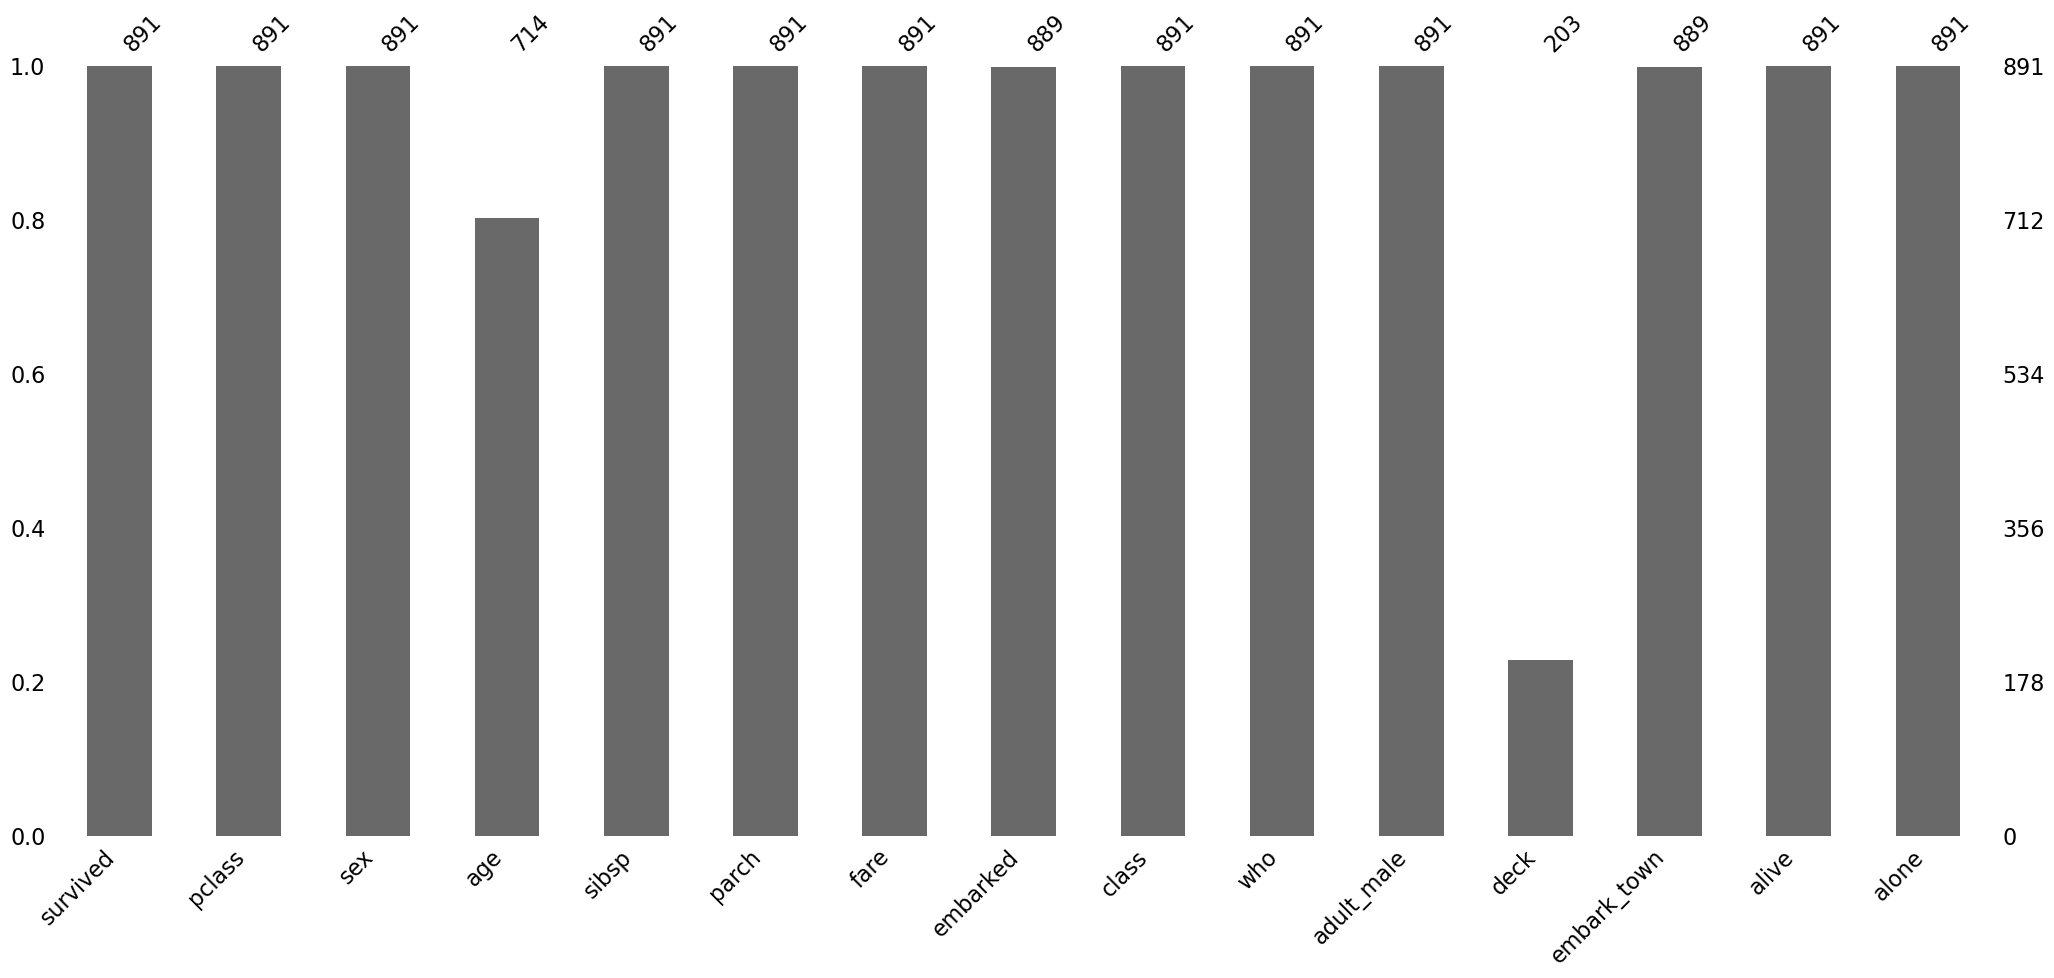

In [4]:
msno.bar(data)


In [5]:
## fill missing values
data.fillna(value=data.mean()[:],inplace=True)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


In [6]:
print(data.isnull().sum())

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [7]:
# I deleted these columns because they are same
print(data.drop(columns=["pclass","who"],inplace=True))
print(data)

None
     survived     sex        age  sibsp  parch     fare embarked   class  \
0           0    male  22.000000      1      0   7.2500        S   Third   
1           1  female  38.000000      1      0  71.2833        C   First   
2           1  female  26.000000      0      0   7.9250        S   Third   
3           1  female  35.000000      1      0  53.1000        S   First   
4           0    male  35.000000      0      0   8.0500        S   Third   
..        ...     ...        ...    ...    ...      ...      ...     ...   
886         0    male  27.000000      0      0  13.0000        S  Second   
887         1  female  19.000000      0      0  30.0000        S   First   
888         0  female  29.699118      1      2  23.4500        S   Third   
889         1    male  26.000000      0      0  30.0000        C   First   
890         0    male  32.000000      0      0   7.7500        Q   Third   

     adult_male deck  embark_town alive  alone  
0          True  NaN  Southampton

In [8]:
#EXPLORE DATA
print(data.describe().T)
print("-"*100)
print(data.shape)

          count       mean        std   min      25%        50%   75%  \
survived  891.0   0.383838   0.486592  0.00   0.0000   0.000000   1.0   
age       891.0  29.699118  13.002015  0.42  22.0000  29.699118  35.0   
sibsp     891.0   0.523008   1.102743  0.00   0.0000   0.000000   1.0   
parch     891.0   0.381594   0.806057  0.00   0.0000   0.000000   0.0   
fare      891.0  32.204208  49.693429  0.00   7.9104  14.454200  31.0   

               max  
survived    1.0000  
age        80.0000  
sibsp       8.0000  
parch       6.0000  
fare      512.3292  
----------------------------------------------------------------------------------------------------
(891, 13)


In [9]:
print(data.groupby("embarked")["survived"].count())
print("><"*100)
print(data.groupby("embarked")["survived"].mean())
print("><"*100)
print(data.groupby(["embarked","sex"], as_index=False)["survived"].count().sort_values("survived",ascending=False))

embarked
C    168
Q     77
S    644
Name: survived, dtype: int64
><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><
embarked
C    0.553571
Q    0.389610
S    0.336957
Name: survived, dtype: float64
><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><
  embarked     sex  survived
5        S    male       441
4        S  female       203
1        C    male        95
0        C  female        73
3        Q    male        41
2        Q  female        36


/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


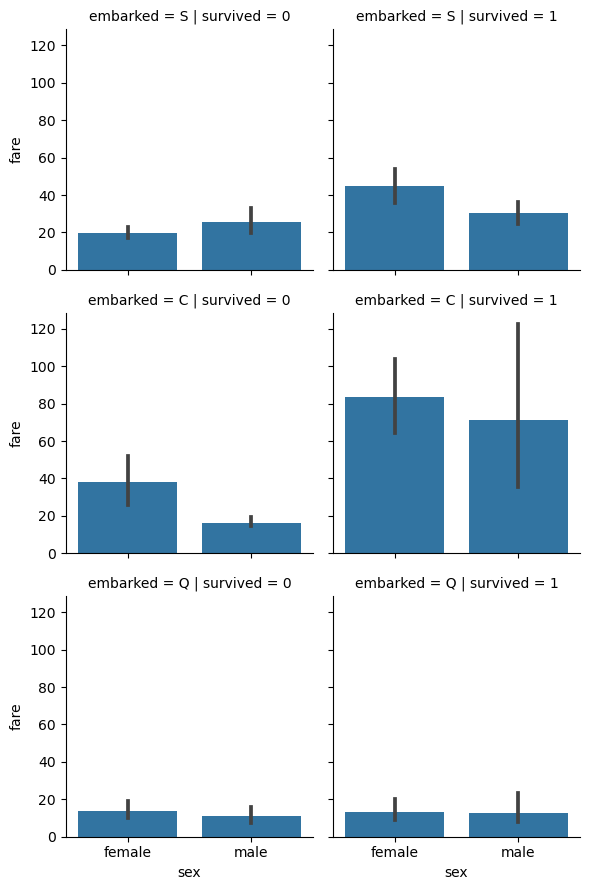

In [10]:
#DATA VİSUALİZATİON
x=sns.FacetGrid(data, col="survived",row="embarked",height=3, xlim=(1,7))
x.map(sns.barplot,"sex","fare")

<AxesSubplot:xlabel='sex', ylabel='age'>

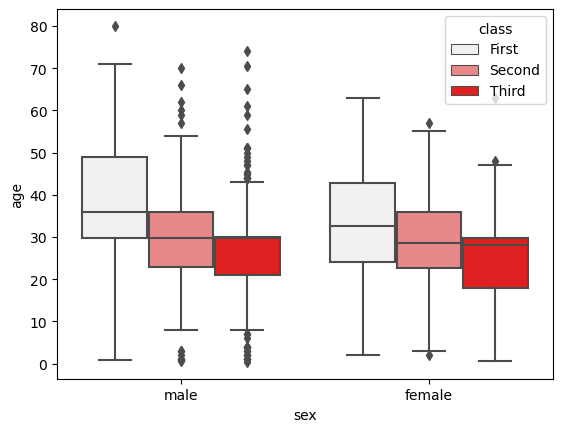

In [11]:
sns.boxplot(data=data,y="age",x="sex",hue="class",color="red")

<AxesSubplot:xlabel='age', ylabel='fare'>

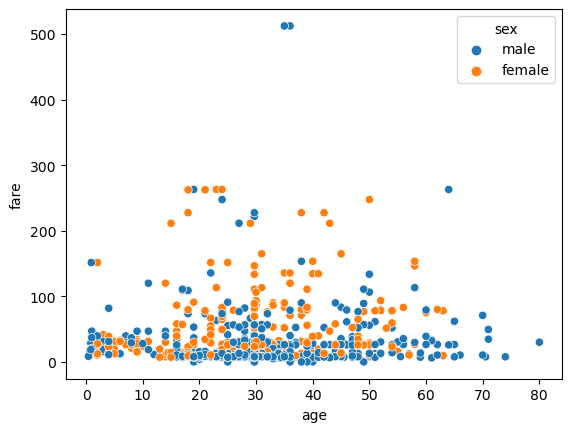

In [12]:
sns.scatterplot(data=data,x="age",y="fare",hue="sex")


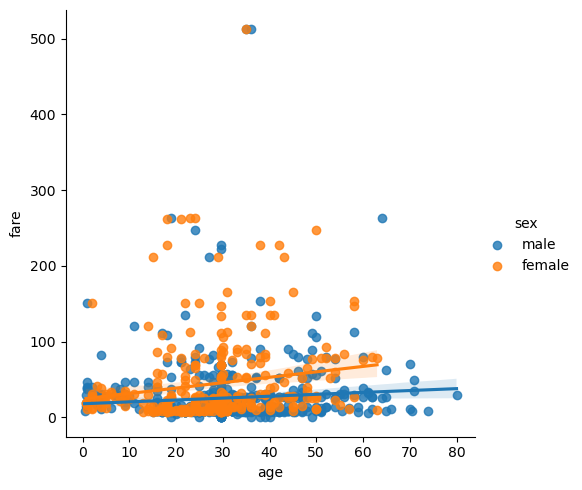

In [13]:
sns.lmplot(data=data,x="age",y="fare",hue="sex")